# Illumina SARS-CoV-2 analysis
In this notebook we will process the results from a Illumina run analyzed previously. In this case, the results from the **"[ARTIC Protocol](https://artic.network/ncov-2019)"** will be processed with a a pipeline named **[viralrecon](https://github.com/nf-core/viralrecon)** that will take the reads and run the following steps:


# VIRALRECON pipeline

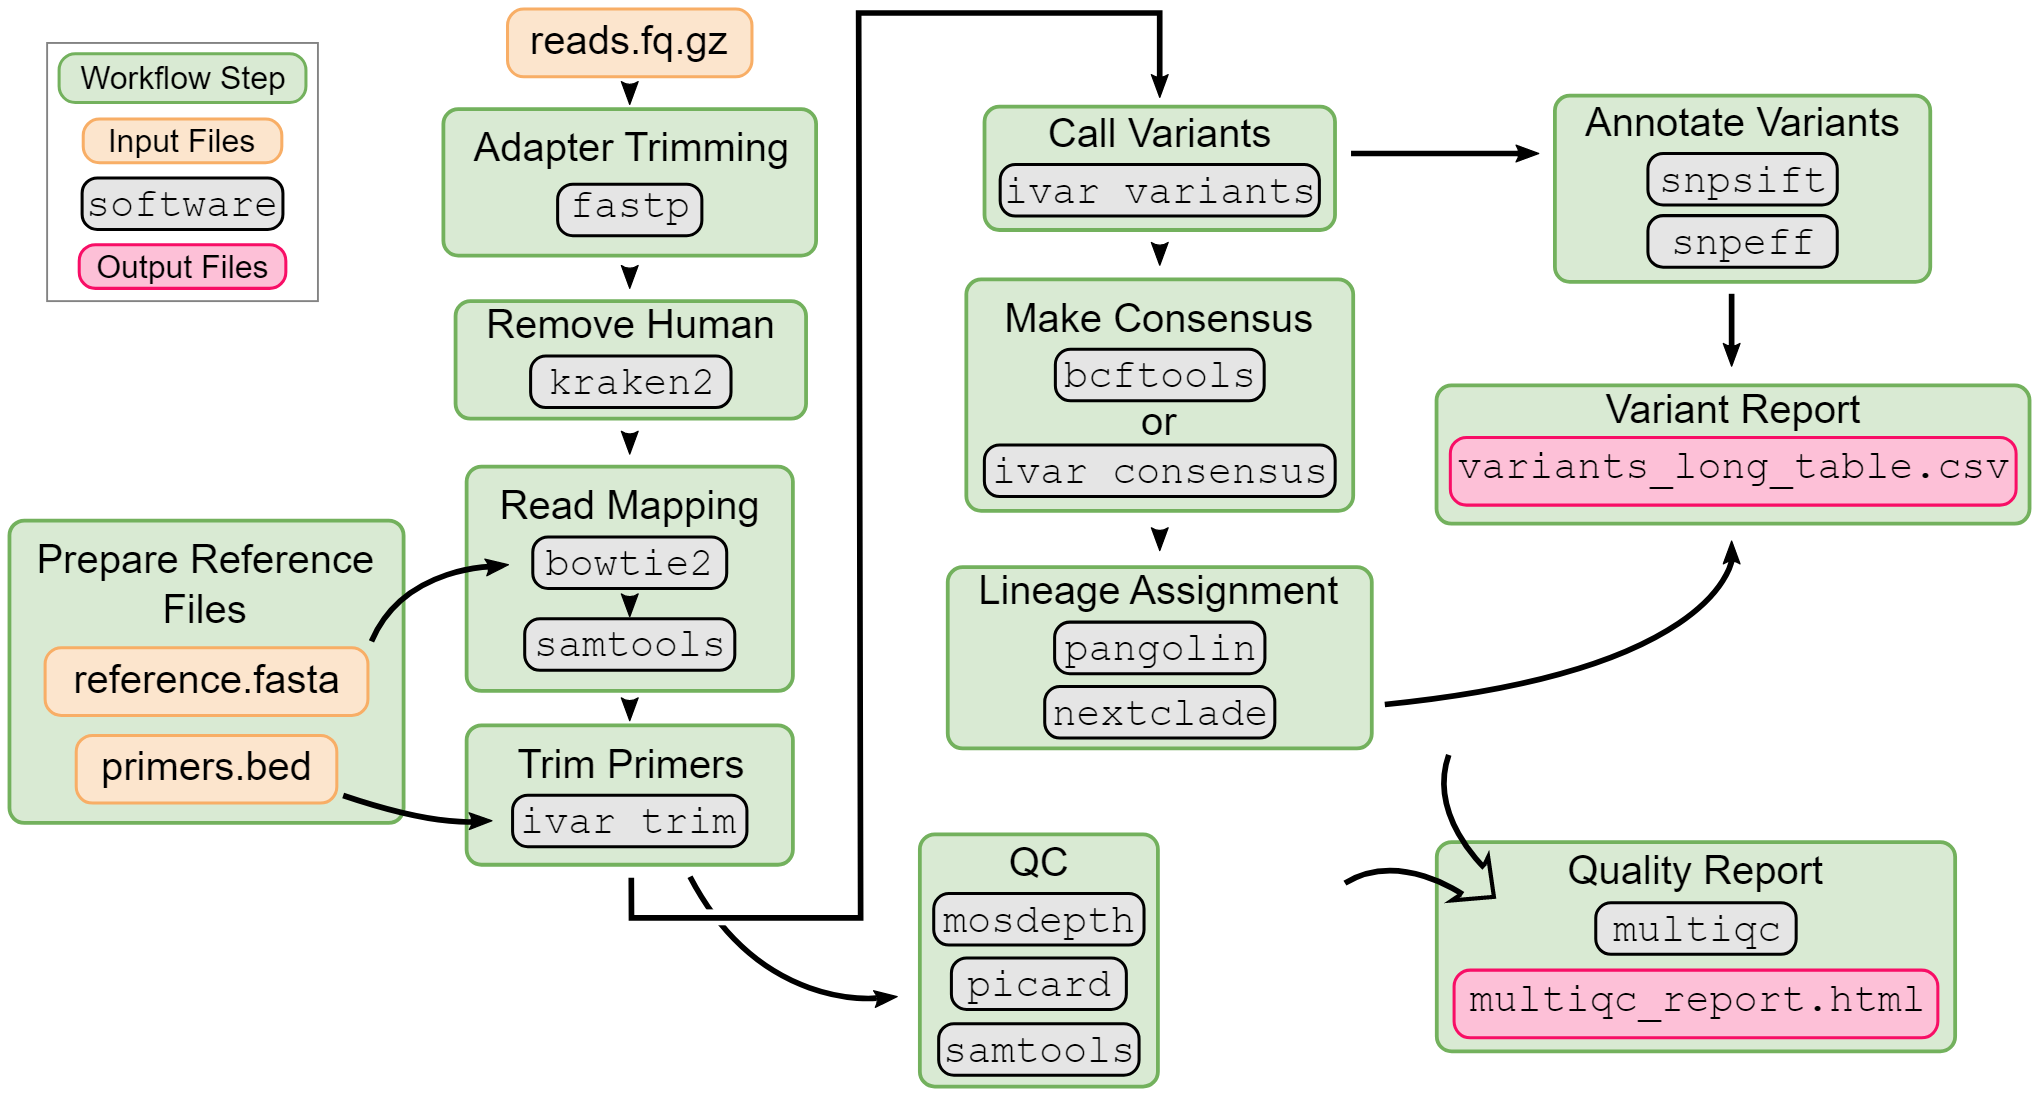

It's not possible to run the viralrecon pipeline in the Google Colab environment because it doesn't have **enough computing power**. However, since you can run this examples in your own computer, we will analyze the results obtained
To install the viral recon pipeline you have to do:

Download all results obtained by the pipeline here

In [ ]:
!gdown 19eqZWxi9NCbY4Z1DOPOEJD2GFCe2h97o ; unzip MAGIC_FOLDER.zip

### Next steps are not for run. We put the commands here for your reference, if you need to run this elsewhere. It will not work.

Installing NextFlow

In [ ]:
import os
os.environ['NXF_VER'] = "20.10.0"
os.environ['NXF_MODE'] = "google"

In [ ]:
!curl https://get.nextflow.io | bash


Install viralrecon

In [ ]:
!nextflow pull nf-core/viralrecon

Remember, if you are running this in your own computer, you must remove the **!** from the beggining of the line.
This pipeline allows you to work either with Nanopore or Illumina data, with only a few modifications. The next command doesn't work, just gives an error message.

In [ ]:
!nextflow run nf-core/viralrecon --input SAMPLE_CSV 
  --outdir OUTPUT_DIRECTORY 
  --protocol amplicon 
  --genome 'MN908947.3' 
  --primer_set artic 
  --primer_set_version 1200 
  --platform nanopore 
  --platform nanopore 
  --artic_minion_caller medaka 
  --artic_minion_medaka_model r941_min_hac_variant_g507 
  --fastq_dir fastq_pass/ 
  -profile conda

Main option passed are

* `--input SAMPLESHEET_CSV` the sample to barcode relation
* `--outdir OUTPUT_DIRECTORY` output folder
* `--protocol amplicon` 
* `--genome 'MN908947.3'` reference genome to use
* `--primer_set artic` protocol ARTIC
* `--primer_set_version 1200` indicates Midnight protocol 
* `--platform nanopore` sequencing platform
* `--artic_minion_caller medaka` variant calling algorithm
* `--artic_minion_medaka_model r941_min_hac_variant_g507` model used for basecalling (error profile)
* `--fastq_dir fastq_pass/` folder with fastq files
* `-profile conda`



The pipeline viralrecon produces summarize the result in a [MultiQC](https://multiqc.info/) HTML report, which can be analyzed.

Please, go to the folder `Illumina_VIRALRECON_results/multiqc` and download the file `multiqc_report.html` to view in a browser.

# Analysis of results

In the MultiQC report you will find a lot of information. From the FastQC report of raw reads to the final consensus and variants identification in each sample. So take it slow and navigate the files and folders...

We are going to bring all consensus sequences to the mail folder to make the viewing easier

In [ ]:
!cp /content/MAGIC_FOLDER/Illumina_VIRALRECON_results/results/variants/ivar/consensus/bcftools/*.consensus.fa .

Please, view the fasta files in a text viewer. You can see that again, there are a few places with Ns in some sequences. Also we can use datafunk to filter bad sequences (in this case, ww'll filter those with more than 10% of Ns)

In [ ]:
#Install datafunk
!pip install https://github.com/aunderwo/datafunk/archive/d608ff89524398469dfefcef7947966fd8c948c6.zip

In [ ]:
#Concatenate sequences in a all_consensus.fa
!cat *.fa > all_consensus.fasta
!mkdir fasta_filtered
!datafunk filter_fasta_by_covg_and_length -i all_consensus.fasta -o fasta_filtered/sequences_qc_passed.fasta --min-covg 90 --min-length 29000

Please, check several samples to analyze the individually for any problems.

> **How many samples were discarded?** 

## Variants

Variant are predicted by analyzing the observed susbtitutions/indels between reads and references. Depth is very important to predict that variants are real. The software uses the information of BAM files (that record the mapping of reads to reference) and use powerful statistics methods to predict possible mutations.
Variants are predicted with specific programs, and in this case, the viralrecon pipeline use **[iVar](https://https://andersen-lab.github.io/ivar/html/manualpage.html)**.
We are going to check some of the results for the samples processed here.

The file `/content/MAGIC_FOLDER/Illumina_VIRALRECON_results/results/variants/ivar/variants_long_table.csv` contains a summary of the variants predicted for each sample. Please, view this in the Table viewer or download and open with any spredsheets viewer.
 

Also, you can view the alignment in the variant regions, by navigating to the files in the folder `/content/MAGIC_FOLDER/Illumina_VIRALRECON_results/results/variants/ivar/asciigenome`. For example, you can check `/content/MAGIC_FOLDER/Illumina_VIRALRECON_results/results/variants/ivar/asciigenome/GB16/GB16.MN908947.3_23659_23759.pdf`

You can individually check for every single variant predicted. You can use any BAM viewer to inspect those regions, but viralrecon already gave you simple visualization, like the one below

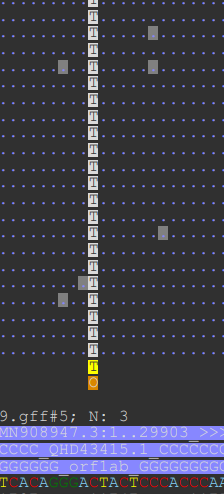

You have now, a group of consensus sequences, QC checked, controled for N content, to follow next week with the course. 



---

